In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

import numpy as np
import matplotlib.pyplot as plt

from mesh import *
from geometry import *
import material
import cross_section
import beam_element
import structure
import solver

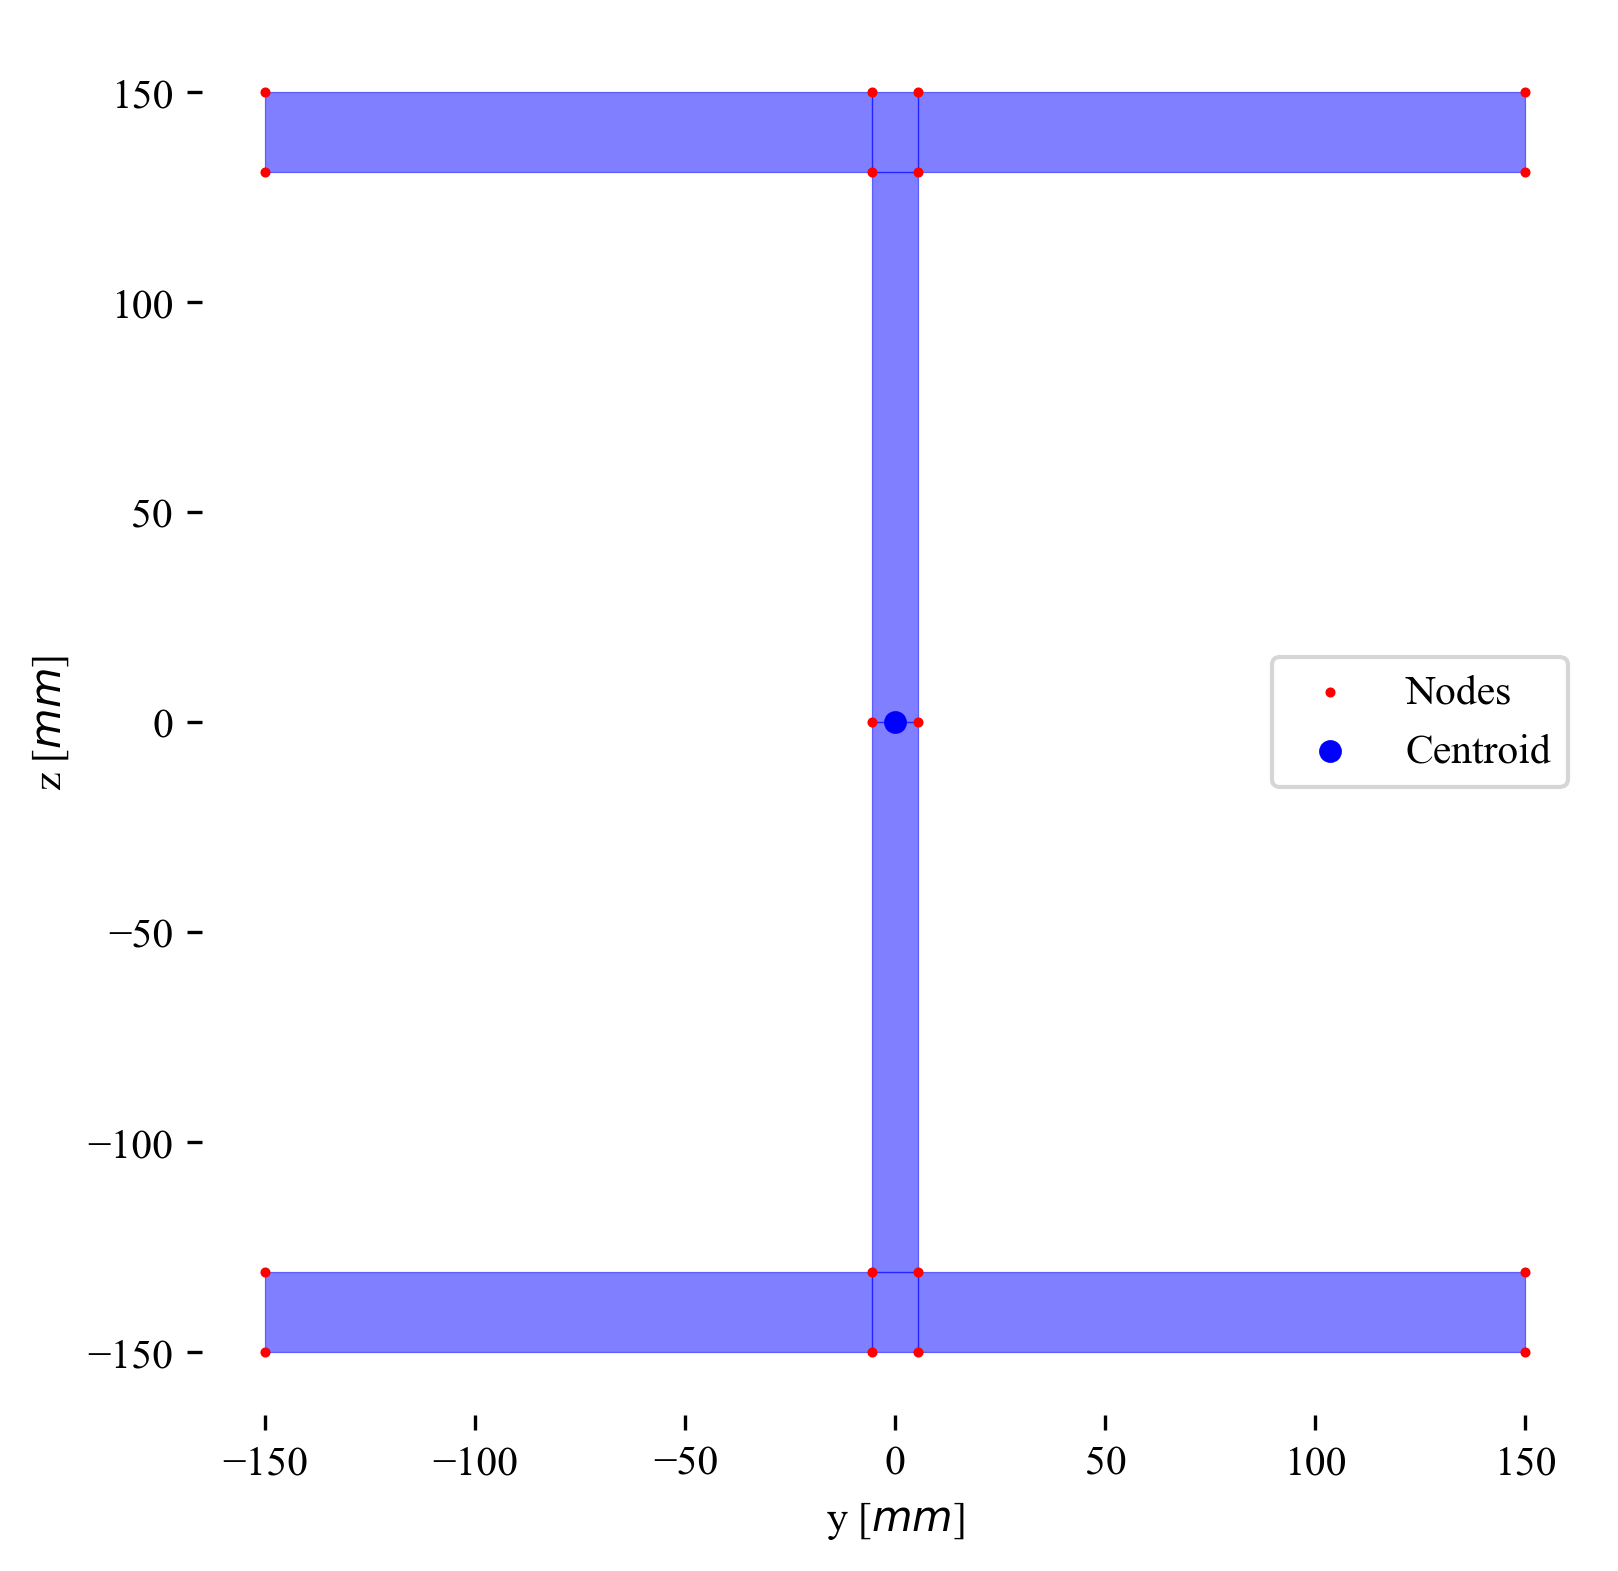

In [9]:
HEB_300 = H_beam(web_width     =  11.0,
                 web_height    = 262.0,
                 flange_width  = 300.0,
                 flange_height =  19.0)
beam = Mesh(HEB_300, mesh_type="quadrilateral", mesh_size=100)
beam.plot()


In [3]:
struc_3  = structure.Cantilever(beam        = beam, 
								length      = 1000, 
								load_DOFs   = [6+2],
								nodal_loads = [1],
								number_of_sections_per_elemnt = 3)
struc_4  = structure.Cantilever(beam        = beam, 
								length      = 1000, 
								load_DOFs   = [6+2],
								nodal_loads = [1],
								number_of_sections_per_elemnt = 4)
struc_6  = structure.Cantilever(beam        = beam, 
								length      = 1000, 
								load_DOFs   = [6+2],
								nodal_loads = [1],
								number_of_sections_per_elemnt = 6)
struc_10 = structure.Cantilever(beam        = beam, 
								length      = 1000, 
								load_DOFs   = [6+2],
								nodal_loads = [1],
								number_of_sections_per_elemnt = 10)
struc_20 = structure.Cantilever(beam        = beam, 
								length      = 1000, 
								load_DOFs   = [6+2],
								nodal_loads = [1],
								number_of_sections_per_elemnt = 20)

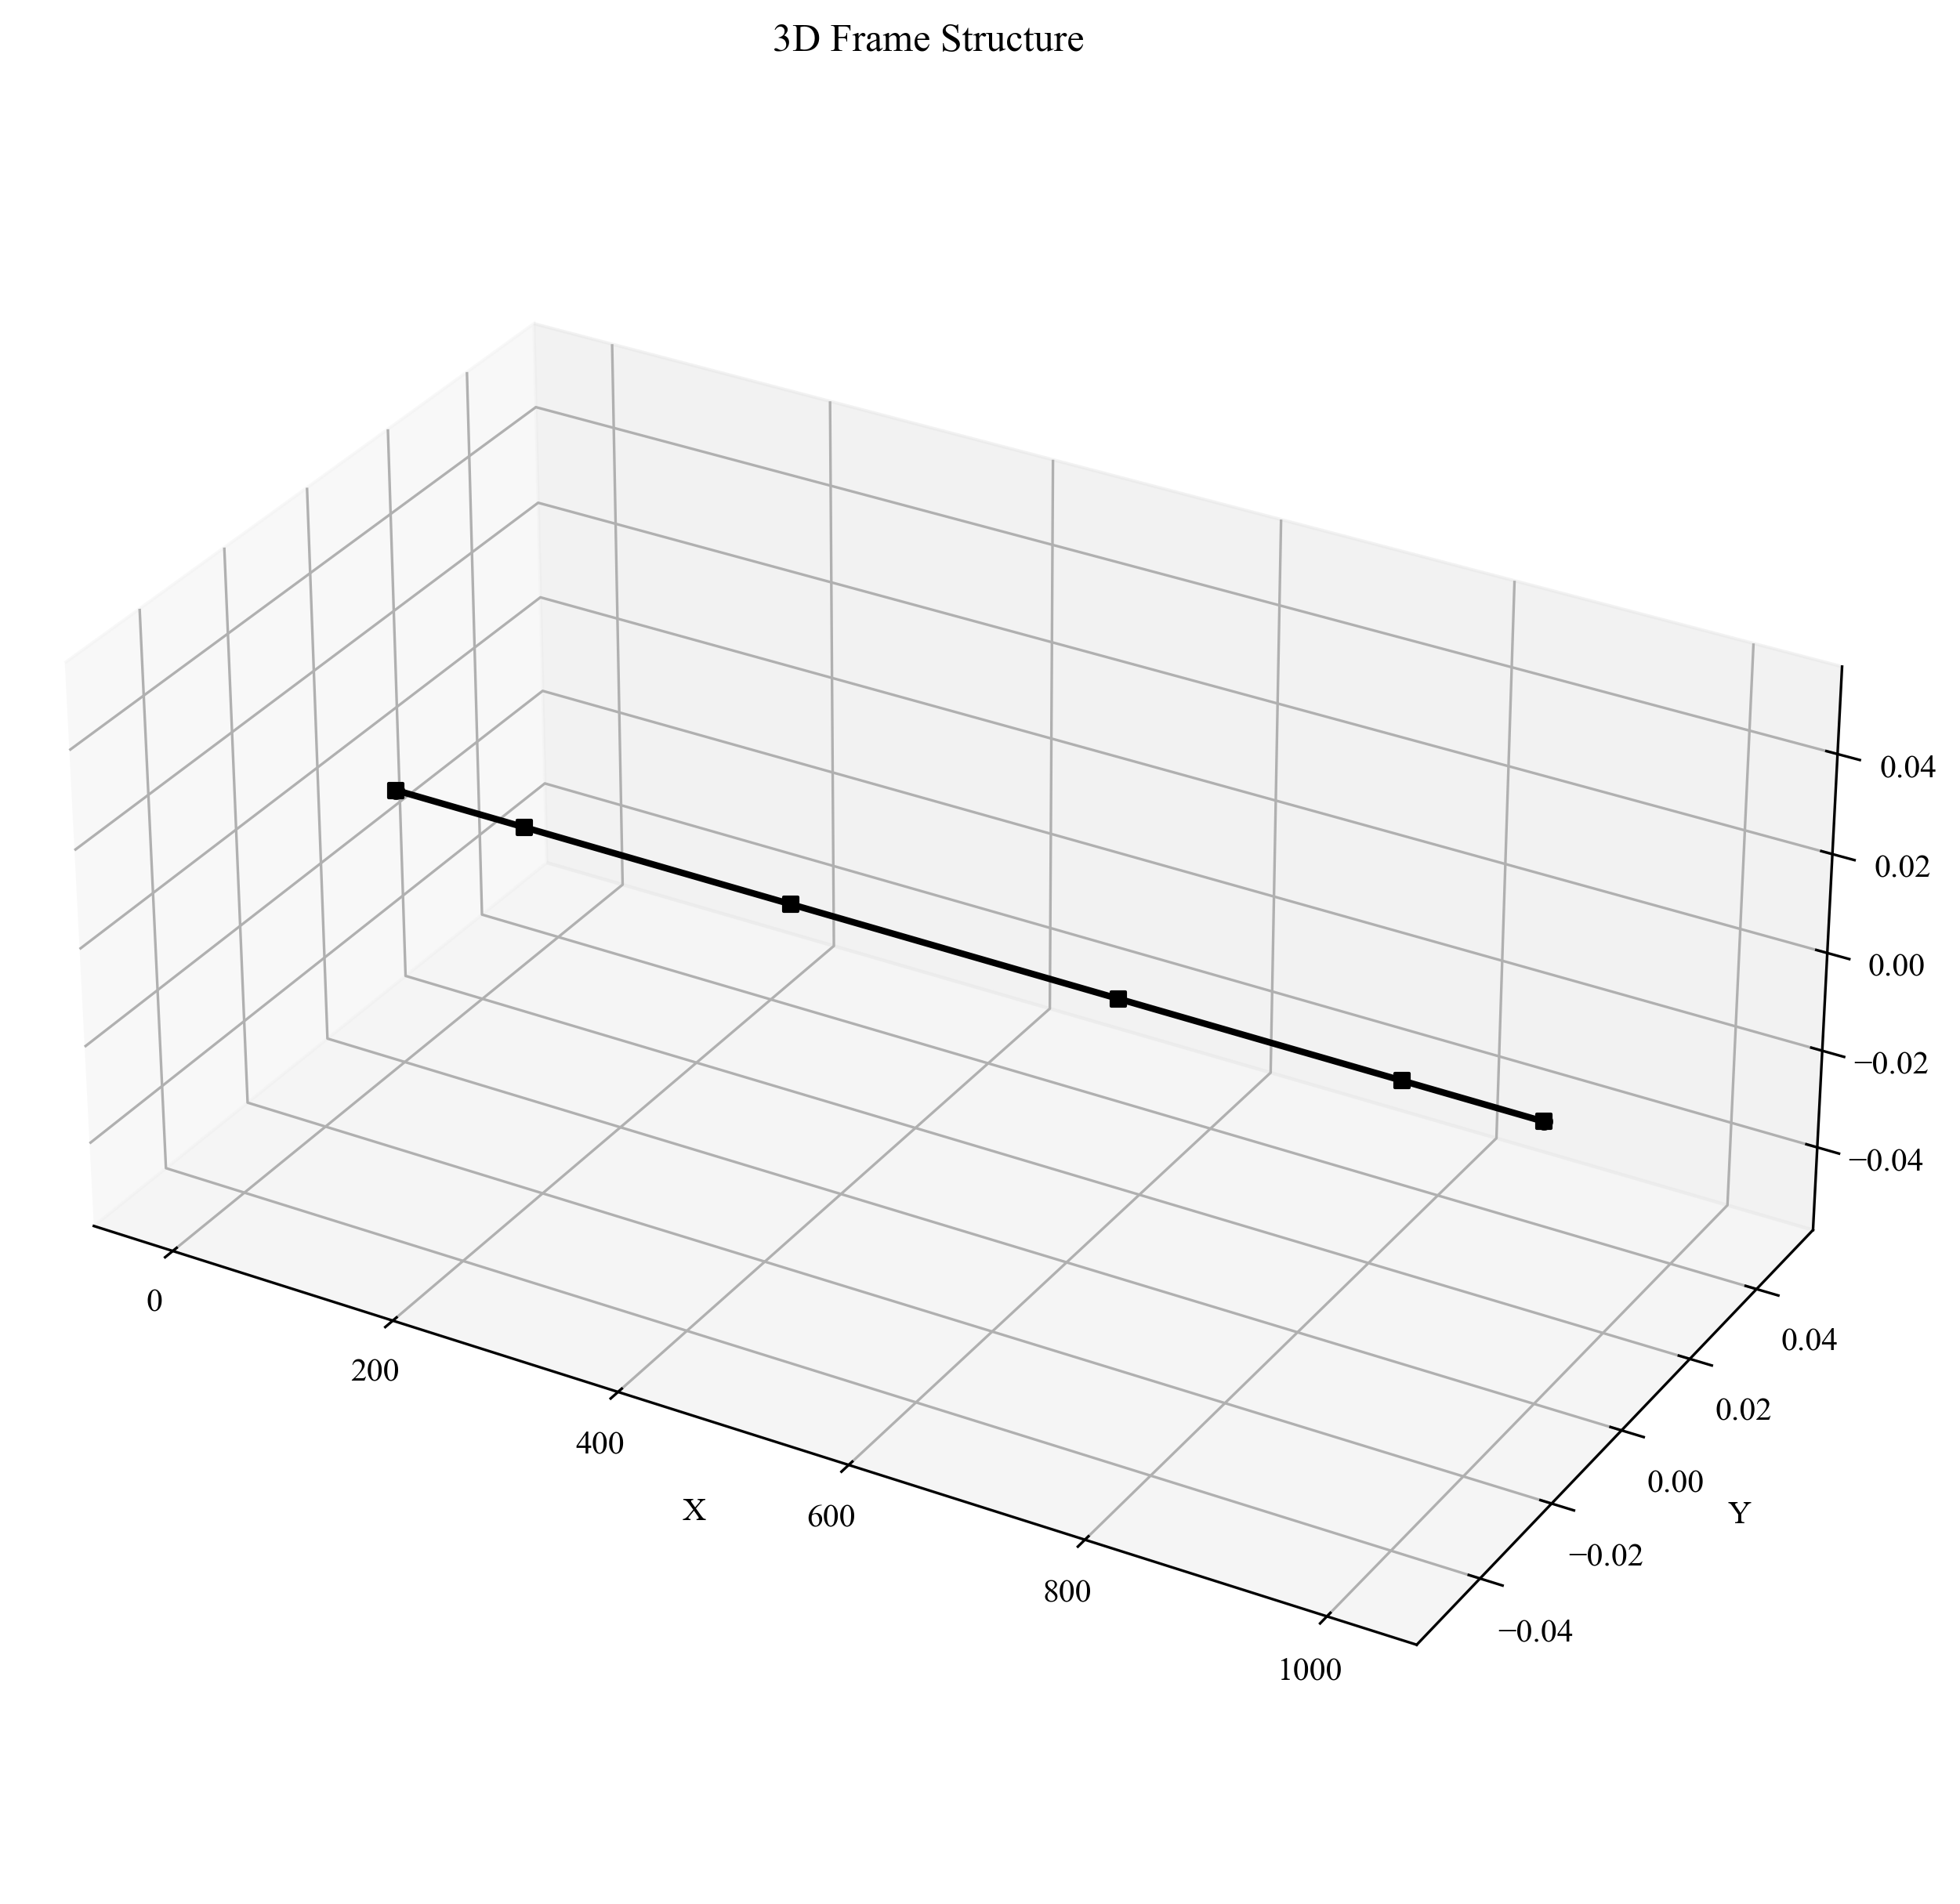

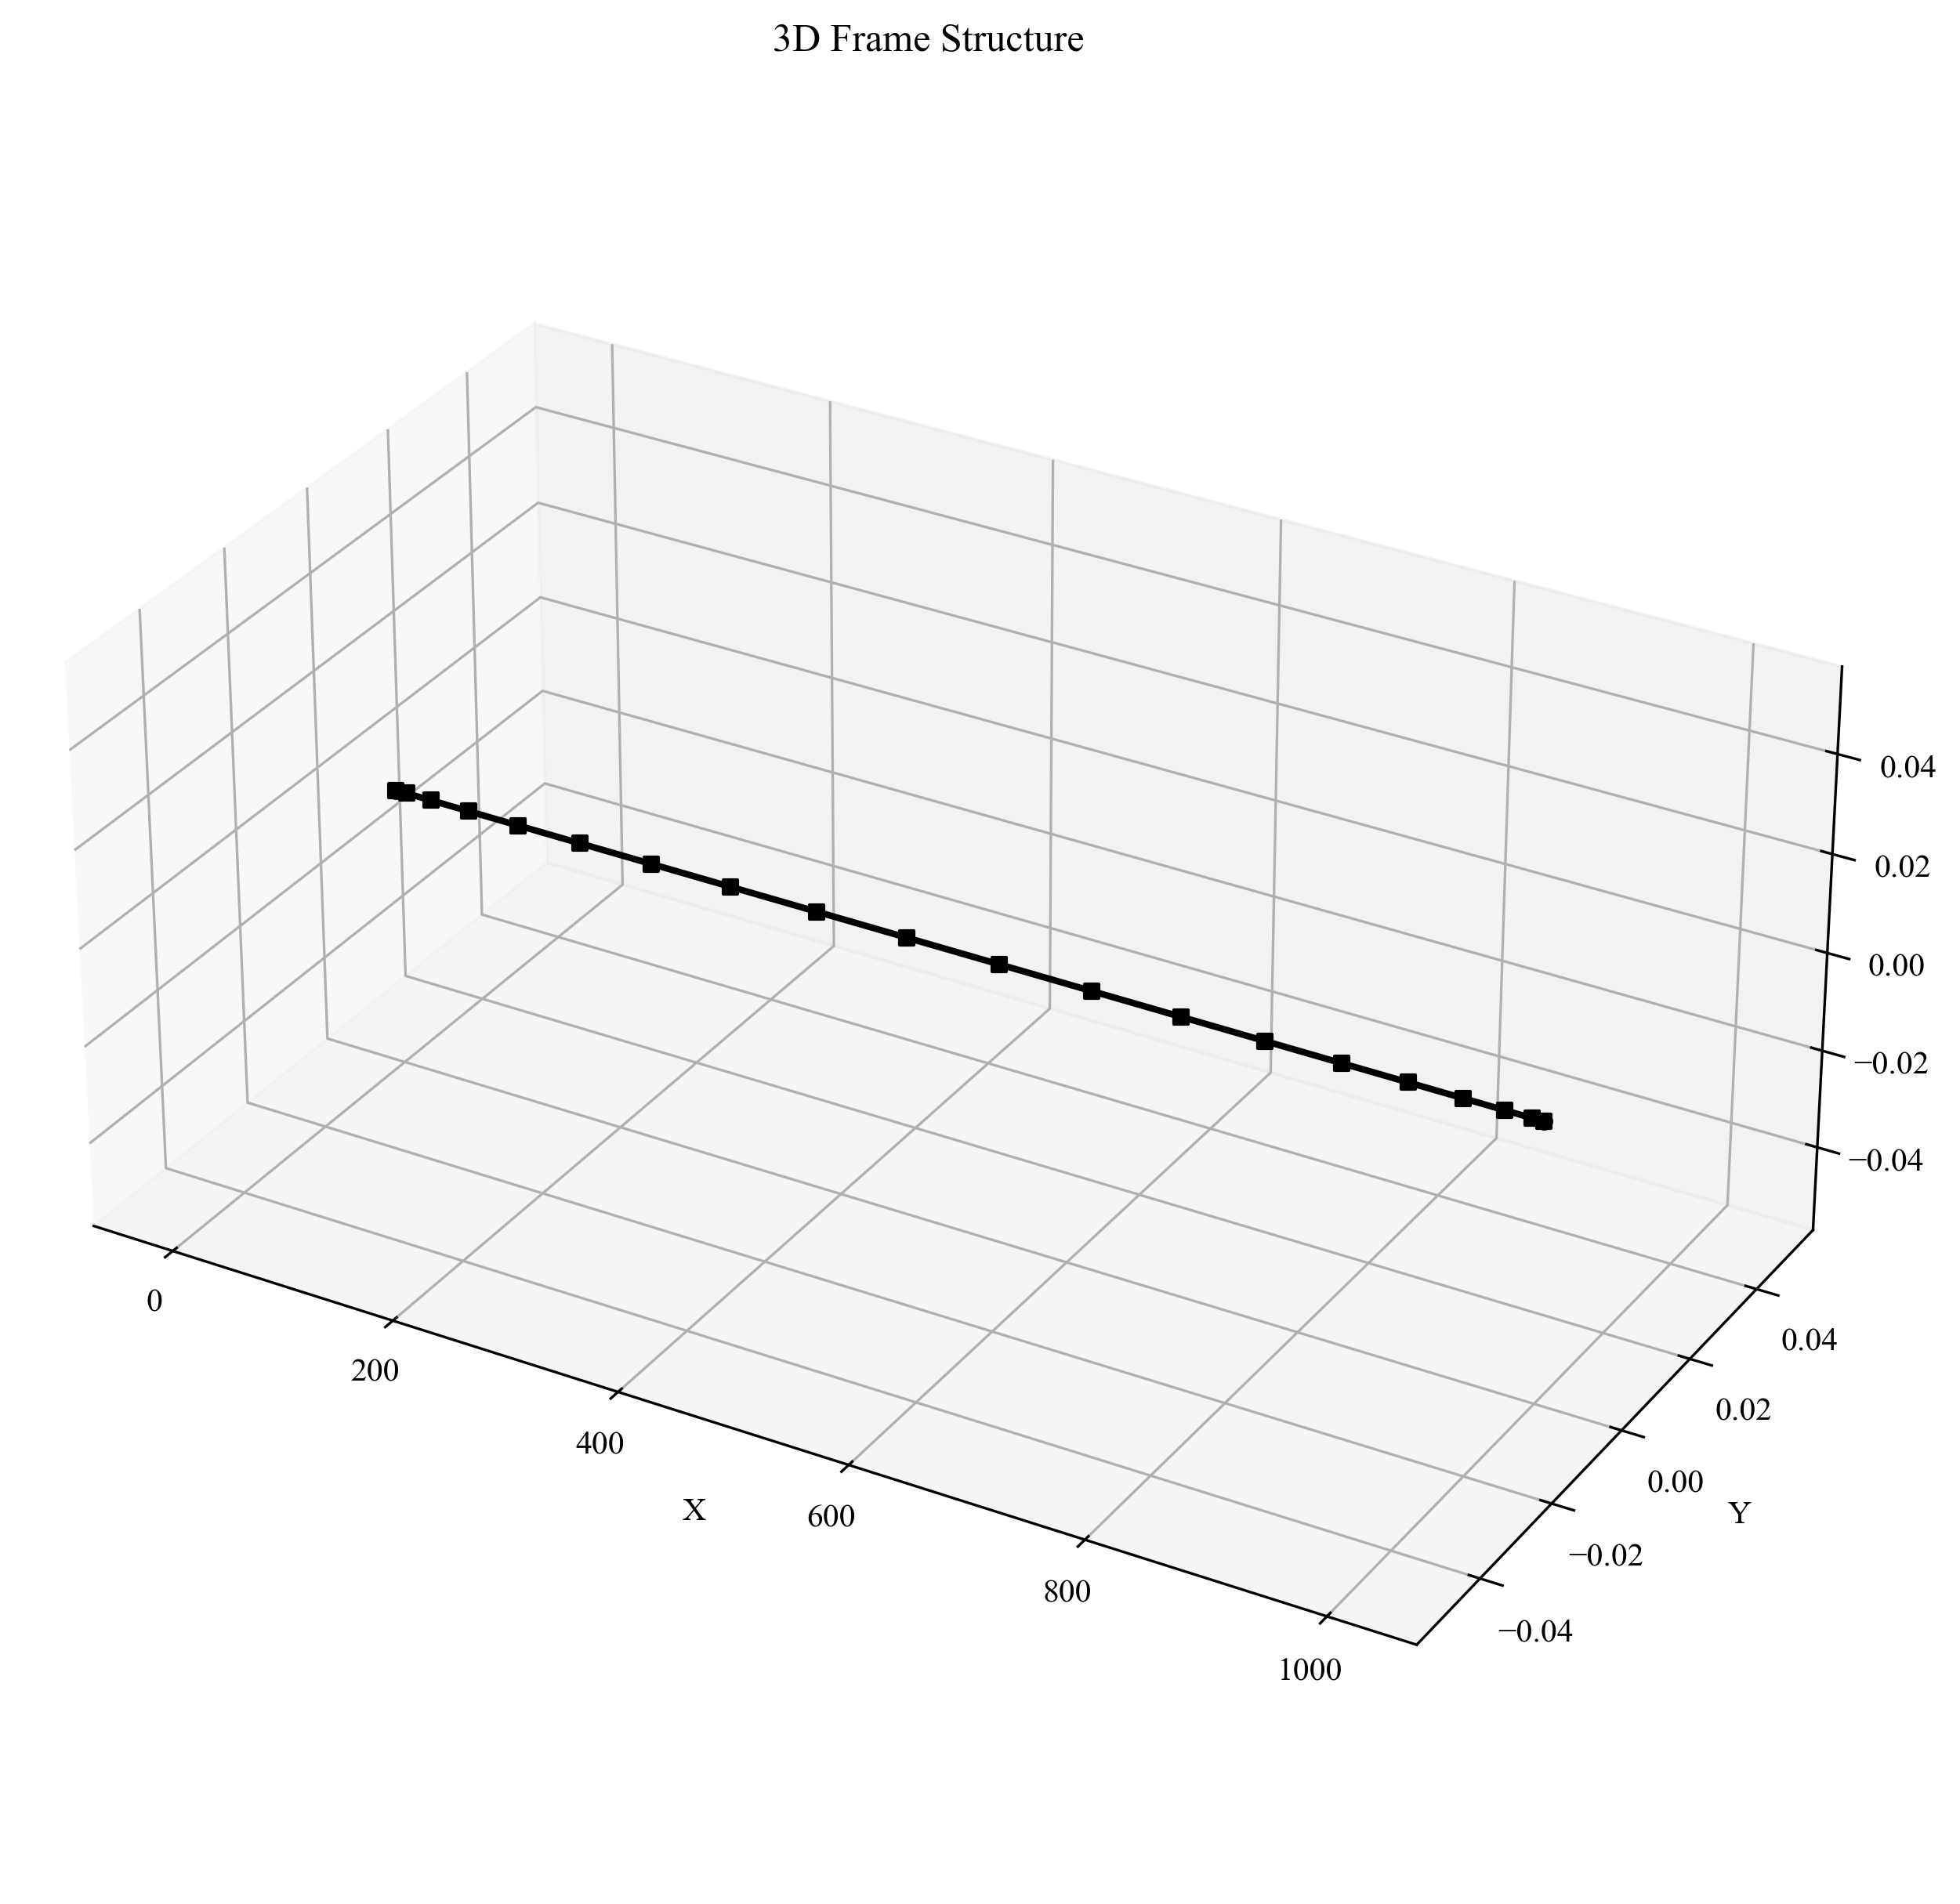

In [8]:
lin_solver = solver.Linear(struc_6)
lin_solver.plot_initial_structure()
lin_solver = solver.Linear(struc_20)
lin_solver.plot_initial_structure()

In [5]:
non_linear_solver_3  = solver.Nonlinear(struc_3, 
									    constraint     ="Displacement", 
									    controlled_DOF = 8)
non_linear_solver_4  = solver.Nonlinear(struc_4, 
									    constraint     ="Displacement", 
									    controlled_DOF = 8)
non_linear_solver_6  = solver.Nonlinear(struc_6, 
									    constraint     ="Displacement", 
									    controlled_DOF = 8)
non_linear_solver_10 = solver.Nonlinear(struc_10, 
									    constraint     ="Displacement", 
									    controlled_DOF = 8)
non_linear_solver_20 = solver.Nonlinear(struc_20, 
									    constraint     ="Displacement", 
									    controlled_DOF = 8)

In [6]:
increments = np.zeros(400)
increments.fill(0.05)

from contextlib import redirect_stdout
with open(os.devnull, 'w') as f, redirect_stdout(f):
	u_history_3 , lambda_history_3  = non_linear_solver_3.solve(increments)
	u_history_4 , lambda_history_4  = non_linear_solver_4.solve(increments)
	u_history_6 , lambda_history_6  = non_linear_solver_6.solve(increments)
	u_history_10, lambda_history_10 = non_linear_solver_10.solve(increments)
	u_history_20, lambda_history_20 = non_linear_solver_20.solve(increments)

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

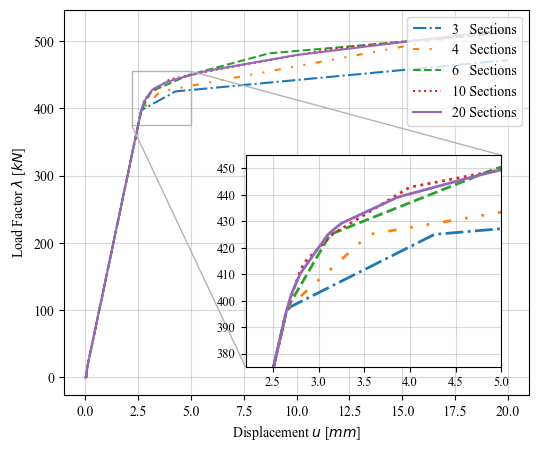

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Main figure and axes
fig, ax = plt.subplots(figsize=(6, 5))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300

ls=["dashdot", (0, (3, 5, 1, 5, 1, 5)),"dashed", "dotted","-"]

ax.plot(u_history_3[:,6+2], lambda_history_3/1000,   label="3   Sections", ls=ls[0])
ax.plot(u_history_4[:,6+2], lambda_history_4/1000,   label="4   Sections", ls=ls[1])
ax.plot(u_history_6[:,6+2], lambda_history_6/1000,   label="6   Sections", ls=ls[2])
ax.plot(u_history_10[:,6+2], lambda_history_10/1000, label="10 Sections",  ls=ls[3])
ax.plot(u_history_20[:,6+2], lambda_history_20/1000, label="20 Sections",  ls=ls[4])
ax.set_xlabel("Displacement $u$ [$mm$]")
ax.set_ylabel("Load Factor $\\lambda$ [$kN$]")
ax.legend(loc="upper right")
ax.grid(alpha=0.5)

# Inset plot
axins = inset_axes(ax, width="55%", height="55%", loc='lower right', borderpad=2)
axins.plot(u_history_3[:,6+2], lambda_history_3/1000,   ls=ls[0], lw=2)
axins.plot(u_history_4[:,6+2], lambda_history_4/1000,   ls=ls[1], lw=2)
axins.plot(u_history_6[:,6+2], lambda_history_6/1000,   ls=ls[2], lw=2)
axins.plot(u_history_10[:,6+2], lambda_history_10/1000, ls=ls[3], lw=2)
axins.plot(u_history_20[:,6+2], lambda_history_20/1000, ls=ls[4], lw=2)
axins.set_xlim(2.2, 5.0) 
axins.set_ylim(375, 455)
axins.tick_params(axis='both', which='both', labelsize=9)
axins.grid(alpha=0.5)

# Draw a box and lines to show zoom area
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.7")

plt.show()